# Ridge Regression

### 모듈 임포트

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score
# 모델로 처음엔 릿지 모델을 사용하고 다음엔 교차검증을 적용한 Ridge CV를 사용할 예정입니다.


### 데이터 불러오기

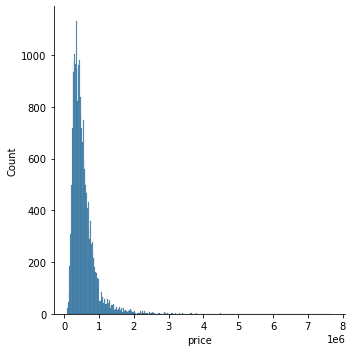

In [11]:
df = pd.read_csv("./kc_house_data.csv")
## to_datetime을 통해 시간과 날짜를 다루기 쉬운 datetime64 형태로 변환합니다.
df['date'] = pd.to_datetime(df['date'])
## 변환된 date를 정렬해서 보겠습니다. 저장되지는 않습니다.
df['date'].sort_values()
## displot, 'price'
sns.displot(df['price']);

### 특성 엔지니어링

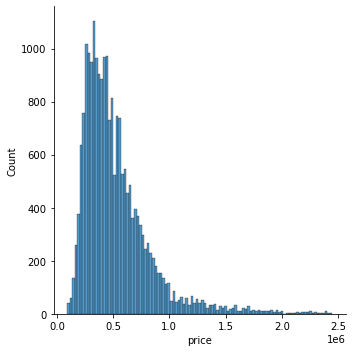

In [12]:
# np.percentile 사용해 이상치 제거 (한쪽으로 쏠렸기 때문에 상하위 5% 제거)
df = df[(df['price'] >= np.percentile(df['price'], 0.05)) & 
        (df['price'] <= np.percentile(df['price'], 99.5))] 

sns.displot(df['price']);


In [13]:
## 2015-03-01을 기준으로 훈련/테스트 세트를 분리합니다.
cutOff = pd.to_datetime('2015-03-01')
train = df[df['date'] < cutOff]
test  = df[df['date'] >= cutOff]
train.shape, test.shape

((16772, 21), (4721, 21))

In [14]:
def engineer_features(X):

    # pandas.DataFrame.copy()
    X = X.copy()
    
    ## 욕실 갯수을 정수형으로 처리합니다.
    X['bathrooms'] = X['bathrooms'].round(0).astype(int)

    ## 총 방 수를 합하여 rooms로 합쳐 봅시다.
    X['rooms'] = X['bedrooms'] + X['bathrooms'] # 다중공선성


    ## 사용하지 않을 특성을 삭제합니다.
    X = X.drop(['id', 'date', 'waterfront'],axis=1) #의미가 없는 정보는 삭제하기

    return X

train = engineer_features(train)
test = engineer_features(test)

In [15]:
from math import factorial

n = len(train.columns)

def n_choose_k(n, k):
    return factorial(n)/(factorial(k)*factorial(n-k))

combinations = sum(n_choose_k(n,k) for k in range(1,n+1))

combinations

# print(f'{combinations:,.0f}')

524287.0

In [16]:
target = 'price'

## X_train, y_train, X_test, y_test 데이터로 분리
X_train = train.drop(columns=target)
y_train = train[target]
X_test = test.drop(columns=target)
y_test = test[target]

### 모델 학습

릿지 회귀, 람다 파라미터=0.001
테스트 세트 MAE: $167,320


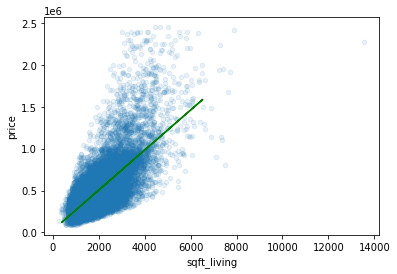

릿지 회귀, 람다 파라미터=0.01
테스트 세트 MAE: $167,320


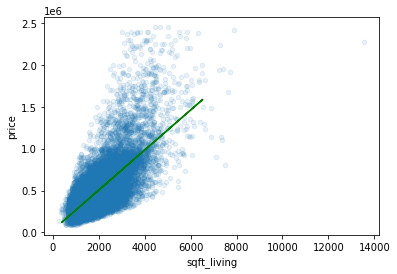

릿지 회귀, 람다 파라미터=1.0
테스트 세트 MAE: $167,320


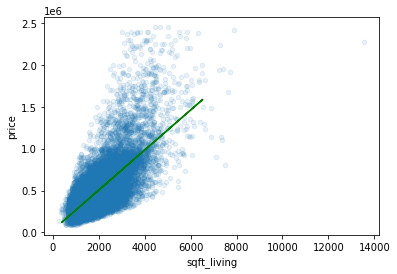

릿지 회귀, 람다 파라미터=10.0
테스트 세트 MAE: $167,320


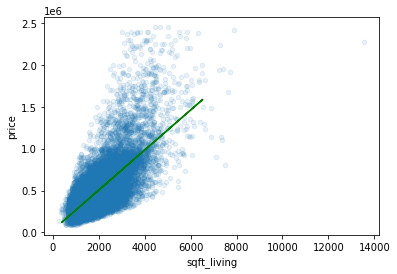

릿지 회귀, 람다 파라미터=100.0
테스트 세트 MAE: $167,320


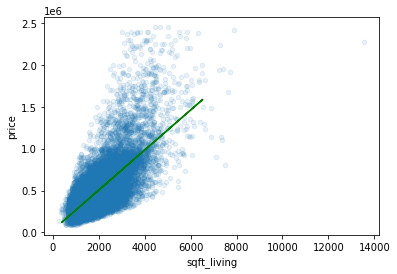

In [21]:

for alpha in [0.001, 0.01, 1.0, 10.0, 100.0]:
    feature = 'sqft_living'
    print(f'릿지 회귀, 람다 파라미터={alpha}')
    model = Ridge(alpha=alpha, normalize=True) # Ridge 모델 객체 생성
    model = make_pipeline(StandardScaler(with_mean=False), Ridge())
    
    # 학습
    model.fit(X_train[[feature]], y_train)
    
    # 훈련 세트
#     y_pred = model.predict(X_train[[feature]])    
#     mae = mean_absolute_error(y_train, y_pred)
#     print(f'Train MAE: ${mae:,.0f}')
    
#     train.plot.scatter(feature, target, alpha=0.1)
#     plt.plot(X_test[feature], y_pred, color='green')
#     plt.show()
    
    # 테스트 세트
    y_pred = model.predict(X_test[[feature]])    
    mae = mean_absolute_error(y_test, y_pred)
    print(f'테스트 세트 MAE: ${mae:,.0f}')
    
    # 플롯 그리기
    train.plot.scatter(feature, target, alpha=0.1)
    plt.plot(X_test[feature], y_pred, color='green')
    plt.show()

### 전체 데이터 적용하기

릿지 회귀, 람다 파라미터=0.001
테스트 세트 MAE: $118,969
테스트 세트 R2: 0.675


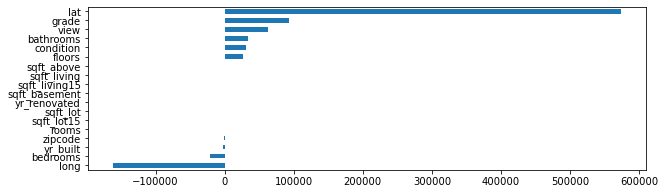

릿지 회귀, 람다 파라미터=0.01
테스트 세트 MAE: $118,770
테스트 세트 R2: 0.675


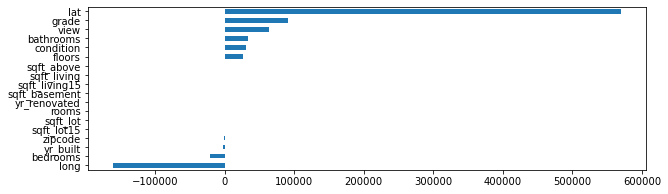

릿지 회귀, 람다 파라미터=1.0
테스트 세트 MAE: $127,524
테스트 세트 R2: 0.594


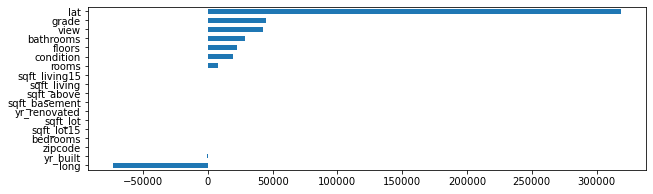

릿지 회귀, 람다 파라미터=10.0
테스트 세트 MAE: $179,854
테스트 세트 R2: 0.281


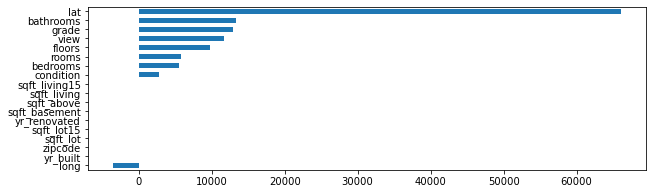

릿지 회귀, 람다 파라미터=100.0
테스트 세트 MAE: $211,820
테스트 세트 R2: 0.044


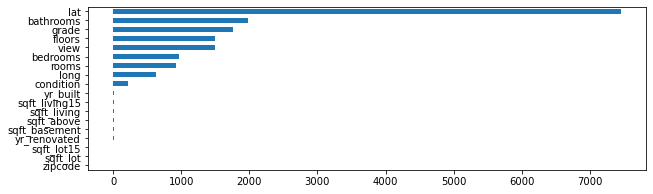

In [25]:
for alpha in [0.001, 0.01, 1.0, 10.0, 100.0]:
    feature = 'sqft_living'
    print(f'릿지 회귀, 람다 파라미터={alpha}')
    
    # 모델 학습
    model = Ridge(alpha=alpha, normalize=True) # Ridge 모델 객체 생성
#     model = make_pipeline(StandardScaler(with_mean=False), Ridge())
    model.fit(X_train, y_train)
    
    # 훈련 세트
#     y_pred = model.predict(X_train[[feature]])    
#     mae = mean_absolute_error(y_train, y_pred)
#     print(f'Train MAE: ${mae:,.0f}')
    
#     train.plot.scatter(feature, target, alpha=0.1)
#     plt.plot(X_test[feature], y_pred, color='green')
#     plt.show()
    
    # 테스트 세트
    y_pred = model.predict(X_test)    
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'테스트 세트 MAE: ${mae:,.0f}')
    print(f'테스트 세트 R2: {r2:,.3f}')
    
    # plot coefficients
    coefficients = pd.Series(model.coef_, X_train.columns)
    plt.figure(figsize=(10,3))
    coefficients.sort_values().plot.barh()
    plt.show()

### 다항 회귀에 적용하기

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def RidgeRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         Ridge(**kwargs))


for alpha in [0.001, 0.01, 0.0025, 0.05, 0.09, 0.12, 0.4, 1.0, 1, 5, 10, 100]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge 모델 학습
    model = RidgeRegression(alpha=alpha, normalize=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # MAE for test
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps["ridge"].coef_
print(f'Number of Features: {len(coefs)}')

## CV 적용하기

In [27]:
def RidgeCVRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         RidgeCV(**kwargs))

# alphas = np.linspace(0.01, 0.5, num=20)
alphas = np.arange(0.01, 0.2, 0.01) # 람다

# 모델 학습
model = RidgeCVRegression(alphas=alphas, normalize=True, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 테스트 세트 성능 평가
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

### 회귀 계수 파악
coefs = model.named_steps["ridgecv"].coef_
print(f'Number of Features: {len(coefs)}')

print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}') # best score: R2

Test MAE: $111,705
R2 Score: 0.6945

Number of Features: 1330
alpha: 0.06999999999999999
cv best score: 0.7403019606698996


In [29]:
X_total = pd.concat([X_train, X_test])
y_total = pd.concat([y_train, y_test])

model = RidgeCVRegression(alphas=alphas, normalize=True, cv=5)
model.fit(X_total, y_total)

coefs = model.named_steps["ridgecv"].coef_
print(f'Number of Features: {len(coefs)}')

print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}')

Number of Features: 1330
alpha: 0.19
cv best score: 0.7255485997685631


In [30]:
coefs.max(), coefs.mean()
# 회귀계수들을 정렬합니다.
coefs.sort()
coefs

array([-17325.27799422,  -1175.83656738,   -919.34030661, ...,
          715.54010685,    719.44854755,  70325.1606576 ])